In [2]:
import numpy as n
import pandas as p
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style()

In [3]:
from sklearn import metrics
import string 
import json
train_data=p.read_json("train.json")

In [4]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [6]:
# Data, we have

In [7]:
train_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [8]:
train_data.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [9]:
# Calculating the length of ingredients

In [10]:
train_data['length']=train_data['ingredients'].apply(len)

In [11]:
train_data.head()

,cuisine,id,ingredients,length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


In [12]:
# Grouping data on the basis of  cuisine_name

In [13]:
train_data.groupby('cuisine').describe()

id                                                        \
               count          mean           std    min       25%      50%   
cuisine                                                                      
brazilian      467.0  25472.366167  14283.106437  203.0  13174.00  25620.0   
british        804.0  25212.152985  14266.986737  168.0  12647.75  25205.5   
cajun_creole  1546.0  24765.837646  14019.280693   29.0  12664.25  24247.0   
chinese       2673.0  24755.108118  14392.581659    3.0  12199.00  24941.0   
filipino       755.0  24885.507285  14317.468463   87.0  12833.00  24976.0   
french        2646.0  24634.241497  14091.200530    2.0  12429.00  24363.5   
greek         1175.0  24658.258723  14525.186898   34.0  11965.50  24762.0   
indian        3003.0  25165.607393  14340.912253   16.0  12642.50  25307.0   
irish          667.0  24995.655172  14429.338971   44.0  12046.50  25495.0   
italian       7838.0  24736.780301  14339.738071    4.0  12348.50  24693.0   
jamaican       526.0  24477.600760  14397.487070   30.0  12245.25  23994.0   
japanese      1423.0  24867.964863  14392.669513   32.0  12979.00  24464.0   
korean         830.0  25060.720482  14330.996146   79.0  12546.25  25721.0   
mexican       6438.0  24886.905561  14484.494206    1.0  12380.00  24831.0   
moroccan       821.0  25485.309379  14299.924633   63.0  14032.00  26430.0   
russian        489.0  25599.642127  14625.513241   40.0  12586.00  26207.0   
southern_us   4320.0  24675.439583  14338.782190    9.0  12179.00  24640.0   
spanish        989.0  25252.100101  14652.037081    0.0  12662.00  26310.0   
thai          1539.0  24715.289799  14351.105877   21.0  12386.00  24705.0   
vietnamese     825.0  24642.495758  14610.336559  107.0  11023.00  25042.0   

                                 length                                       \
                   75%      max   count       mean       std  min  25%   50%   
cuisine                                                                        
brazilian     37723.00  49683.0   467.0   9.520343  5.555139  2.0  5.0   9.0   
british       37975.00  49648.0   804.0   9.708955  4.165011  2.0  7.0   9.0   
cajun_creole  36679.50  49702.0  1546.0  12.617076  4.611601  2.0  9.0  12.0   
chinese       37286.00  49673.0  2673.0  11.982791  4.042125  2.0  9.0  12.0   
filipino      37534.50  49682.0   755.0  10.000000  3.855135  2.0  7.0  10.0   
french        36754.75  49696.0  2646.0   9.817838  4.144744  1.0  7.0   9.0   
greek         37225.00  49710.0  1175.0  10.182128  3.729461  1.0  7.0  10.0   
indian        37539.00  49716.0  3003.0  12.705961  5.016806  1.0  9.0  12.0   
irish         37140.00  49714.0   667.0   9.299850  3.700505  2.0  7.0   9.0   
italian       37207.25  49708.0  7838.0   9.909033  3.806708  1.0  7.0  10.0   
jamaican      36024.00  49638.0   526.0  12.214829  4.763897  2.0  9.0  12.0   
japanese      37496.00  49536.0  1423.0   9.735067  4.245882  1.0  7.0   9.0   
korean        37321.75  49642.0   830.0  11.284337  3.878880  2.0  9.0  11.0   
mexican       37487.50  49717.0  6438.0  10.877446  4.660183  1.0  7.0  10.0   
moroccan      37787.00  49667.0   821.0  12.909866  4.799813  2.0  9.0  13.0   
russian       37988.00  49703.0   489.0  10.224949  4.051223  2.0  7.0  10.0   
southern_us   37084.25  49713.0  4320.0   9.634954  3.869404  1.0  7.0   9.0   
spanish       38209.00  49666.0   989.0  10.423660  4.160919  1.0  7.0  10.0   
thai          37196.50  49691.0  1539.0  12.545809  4.411794  1.0  9.0  12.0   
vietnamese    37302.00  49652.0   825.0  12.675152  5.256173  1.0  9.0  12.0   

                          
               75%   max  
cuisine                   
brazilian     13.0  59.0  
british       12.0  30.0  
cajun_creole  16.0  31.0  
chinese       14.0  38.0  
filipino      12.0  38.0  
french        12.0  31.0  
greek         12.0  27.0  
indian        16.0  49.0  
irish         12.0  27.0  
italian       12.0  65.0  
jamaican      15.0  35.0  
japa

In [14]:
# e.g. cuisine having id=13162, have these much of ingredients

In [15]:
train_data[train_data['id']==13162]['ingredients'].iloc[0]

['black pepper',
 'shallots',
 'cornflour',
 'cayenne pepper',
 'onions',
 'garlic paste',
 'milk',
 'butter',
 'salt',
 'lemon juice',
 'water',
 'chili powder',
 'passata',
 'oil',
 'ground cumin',
 'boneless chicken skinless thigh',
 'garam masala',
 'double cream',
 'natural yogurt',
 'bay leaf']

In [16]:
train_data[train_data['id']==10259]['ingredients'].iloc[0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [17]:
df=train_data.drop(['id','ingredients'],axis=1)

In [18]:
df.head()

,cuisine,length
0,greek,9
1,southern_us,11
2,filipino,12
3,indian,4
4,indian,20


In [19]:
df=df.groupby('cuisine').sum()

In [20]:
# shows Total length of ingredients in each type of cuisines

In [21]:
df

,length
cuisine,
brazilian,4446
british,7806
cajun_creole,19506
chinese,32030
filipino,7550
french,25978
greek,11964
indian,38156
irish,6203


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200E3187438>,
      dtype=object)

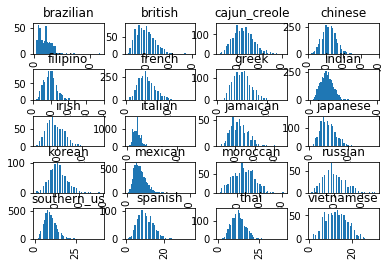

In [22]:

train_data.hist(column='length',by='cuisine',bins=50)

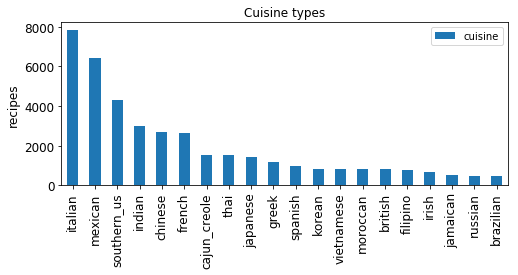

In [24]:
ax = train_data['cuisine'].value_counts().plot(kind='bar', title ="Cuisine types", figsize=(8, 3), legend=True, fontsize=12)
ax.set_ylabel("recipes", fontsize=12)
plt.show()

In [25]:
count_object=CountVectorizer(max_features=2000)

In [26]:
words=[' '.join(t) for t in train_data['ingredients']]
bag_of_words_train=count_object.fit(words).transform(words)

In [27]:
words

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil',
 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers',
 'water vegetable oil wheat salt',
 'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf',
 'plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder',
 'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage',
 'sugar pistachio nuts white almond bark flour vanilla e

In [28]:
bag_of_words_train[0]

<1x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [29]:
# applying on single ovservation

In [30]:
ingredient1=train_data['ingredients'][0]

In [31]:
ingredient1

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [32]:
bow1=count_object.fit(ingredient1).transform(ingredient1)

In [33]:
print (bow1)

  (0, 8)	1
  (0, 13)	1
  (1, 1)	1
  (1, 9)	1
  (2, 7)	1
  (2, 15)	1
  (3, 6)	1
  (4, 11)	1
  (5, 10)	1
  (5, 12)	1
  (6, 14)	1
  (7, 0)	1
  (7, 5)	1
  (8, 2)	1
  (8, 3)	1
  (8, 4)	1


In [34]:
tfidf_object=TfidfTransformer()

In [35]:
tfidf1=tfidf_object.fit(bow1).transform(bow1)

In [36]:
print (tfidf1)

  (0, 13)	0.7071067811865476
  (0, 8)	0.7071067811865476
  (1, 9)	0.7071067811865476
  (1, 1)	0.7071067811865476
  (2, 15)	0.7071067811865476
  (2, 7)	0.7071067811865476
  (3, 6)	1.0
  (4, 11)	1.0
  (5, 12)	0.7071067811865476
  (5, 10)	0.7071067811865476
  (6, 14)	1.0
  (7, 5)	0.7071067811865476
  (7, 0)	0.7071067811865476
  (8, 4)	0.5773502691896258
  (8, 3)	0.5773502691896258
  (8, 2)	0.5773502691896258


In [37]:
#applying on whole data

In [38]:
tfidf_train=tfidf_object.fit(bag_of_words_train).transform(bag_of_words_train)

In [39]:
# Naive bayes algorithm initializtion

In [40]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB().fit(tfidf_train,train_data['cuisine'])

In [41]:
print ("perdiction : ",model_nb.predict(tfidf_train))
print ("actual : ",train_data['cuisine'])

perdiction :  ['greek' 'southern_us' 'mexican' ... 'southern_us' 'chinese' 'mexican']
actual :  0               greek
1         southern_us
2            filipino
3              indian
4              indian
5            jamaican
6             spanish
7             italian
8             mexican
9             italian
10            italian
11            chinese
12            italian
13            mexican
14            italian
15             indian
16            british
17            italian
18               thai
19         vietnamese
20               thai
21            mexican
22        southern_us
23            chinese
24            italian
25            chinese
26       cajun_creole
27            italian
28            chinese
29            mexican
             ...     
39744           greek
39745         spanish
39746          indian
39747        moroccan
39748         italian
39749         mexican
39750         mexican
39751        moroccan
39752     southern_us
39753         italian
39

In [42]:
# accuracy with naive bayes algorithm

In [43]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(tfidf_train,train_data['cuisine'])
model_nb.fit(X_train,Y_train)
predictions=model_nb.predict(X_test)
accuracy_nb=metrics.accuracy_score(predictions,Y_test)
print (accuracy_nb)

0.6799074818986324


In [44]:
print (classification_report(Y_test,predictions))

              precision    recall  f1-score   support

   brazilian       1.00      0.23      0.38       120
     british       0.74      0.14      0.23       191
cajun_creole       0.76      0.54      0.63       370
     chinese       0.61      0.89      0.72       663
    filipino       0.86      0.17      0.29       180
      french       0.52      0.47      0.49       658
       greek       0.86      0.38      0.52       283
      indian       0.76      0.90      0.82       762
       irish       0.69      0.11      0.20       158
     italian       0.67      0.88      0.76      1937
    jamaican       0.92      0.16      0.28       147
    japanese       0.92      0.53      0.68       350
      korean       0.92      0.37      0.53       208
     mexican       0.81      0.90      0.85      1627
    moroccan       0.95      0.40      0.56       222
     russian       1.00      0.06      0.11       124
 southern_us       0.51      0.77      0.61      1091
     spanish       0.77    

In [45]:
# intializing svm model and getting accuracy obtained from this model

In [46]:
C=1.0
from sklearn.svm import LinearSVC
svm_object=LinearSVC(C=C)
svm_object.fit(X_train,Y_train)
prediction_svm=svm_object.predict(X_test)
accuracy_svm=metrics.accuracy_score(Y_test,prediction_svm)
print (accuracy_svm)

0.7892196299275945


In [47]:
print (classification_report(prediction_svm,Y_test))

              precision    recall  f1-score   support

   brazilian       0.65      0.83      0.73        94
     british       0.47      0.64      0.54       141
cajun_creole       0.67      0.74      0.70       335
     chinese       0.87      0.80      0.83       723
    filipino       0.69      0.76      0.73       164
      french       0.63      0.58      0.61       706
       greek       0.73      0.76      0.75       270
      indian       0.91      0.85      0.88       820
       irish       0.47      0.60      0.53       126
     italian       0.89      0.82      0.86      2105
    jamaican       0.72      0.83      0.77       128
    japanese       0.68      0.84      0.75       284
      korean       0.76      0.83      0.79       191
     mexican       0.92      0.90      0.91      1648
    moroccan       0.76      0.82      0.79       207
     russian       0.44      0.70      0.54        77
 southern_us       0.79      0.72      0.76      1191
     spanish       0.48    

In [48]:
# intializing Random Froest algorithm

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_object=RandomForestClassifier(n_estimators=200)
rf_object.fit(X_train,Y_train)
prediction_rf=rf_object.predict(X_test)
accuracy_rf=metrics.accuracy_score(Y_test,prediction_rf)
print (accuracy_rf)

0.7413515687851971


In [50]:
print (classification_report(prediction_rf,Y_test))

              precision    recall  f1-score   support

   brazilian       0.52      0.87      0.65        71
     british       0.25      0.75      0.38        64
cajun_creole       0.63      0.79      0.70       292
     chinese       0.86      0.72      0.78       794
    filipino       0.47      0.84      0.60       101
      french       0.50      0.57      0.53       575
       greek       0.57      0.83      0.68       195
      indian       0.91      0.81      0.85       860
       irish       0.36      0.74      0.49        77
     italian       0.92      0.70      0.79      2551
    jamaican       0.42      0.98      0.59        63
    japanese       0.60      0.84      0.70       249
      korean       0.64      0.89      0.75       149
     mexican       0.92      0.83      0.87      1795
    moroccan       0.61      0.88      0.72       153
     russian       0.27      0.87      0.41        38
 southern_us       0.77      0.63      0.69      1340
     spanish       0.27    

In [51]:
X=['accuracry_svm','accuracy_rf','accuracy_nb']
Y=[accuracy_svm,accuracy_rf,accuracy_nb]
print(X)

['accuracry_svm', 'accuracy_rf', 'accuracy_nb']


In [52]:
Y

[0.7892196299275945, 0.7413515687851971, 0.6799074818986324]

In [53]:
df_comparision=DataFrame(X,columns=['diff_models'])

In [54]:
df_comparision['accuracy_from_diff_models']=Y
df_comparision

,diff_models,accuracy_from_diff_models
0,accuracry_svm,0.789220
1,accuracy_rf,0.741352
2,accuracy_nb,0.679907


In [58]:
# comparison b/w three models's accuracy

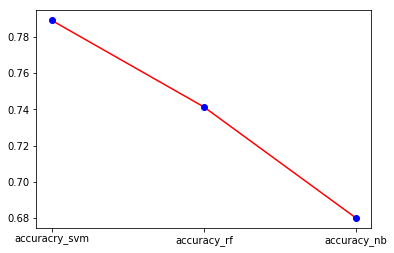

In [57]:
plt.plot(df_comparision.diff_models,df_comparision.accuracy_from_diff_models,c='r')
plt.plot(df_comparision.diff_models,df_comparision.accuracy_from_diff_models,'o',c='b')

In [59]:
# conclusion is that, accuracy with svm model is best among these models 